In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:
inc = pd.read_csv("adult 1.csv",na_values=[" ?"]) #instead of nan ? appeared in case of null values ....hence it was replaced

In [3]:
inc.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,sex,Capital Gain,Capital loss,Hours per week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
inc

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,sex,Capital Gain,Capital loss,Hours per week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
inc.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-num        0
Marital status       0
Occupation        1843
Relationship         0
Race                 0
sex                  0
Capital Gain         0
Capital loss         0
Hours per week       0
Native country     583
Income               0
dtype: int64

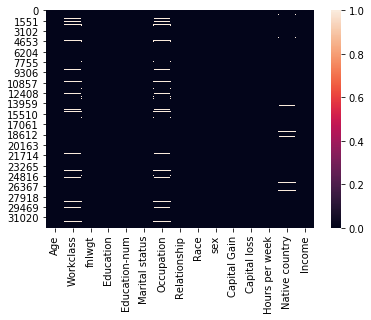

In [6]:
sns.heatmap(inc.isnull())

In [7]:
inc.dropna(inplace = True)

In [8]:
inc

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,sex,Capital Gain,Capital loss,Hours per week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
inc.describe()

,Age,fnlwgt,Education-num,Capital Gain,Capital loss,Hours per week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
inc.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-num      int64
Marital status    object
Occupation        object
Relationship      object
Race              object
sex               object
Capital Gain       int64
Capital loss       int64
Hours per week     int64
Native country    object
Income            object
dtype: object

In [11]:
inc['Workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [12]:
inc['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [13]:
inc['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [14]:
inc['Occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [15]:
inc['Relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [16]:
inc['Capital loss'].unique()

array([   0, 2042, 1408, 1902, 1887, 1719, 1762, 1564, 2179, 1816, 1980,
       1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721, 2051,
       2377, 1669, 2352, 1672,  653, 2392, 1504, 1590, 1651, 1628, 1848,
       2001, 1740, 2002, 1579, 2258, 1602, 2547, 2205, 1726, 2444, 1138,
       2238,  625,  213, 1539,  880, 1668, 1092, 1594, 2231, 1844,  810,
       2824, 2559, 2057, 1573, 1974,  974, 2174, 2149, 1735, 1258, 2603,
       2282,  323, 2246, 1617, 1648, 1825, 3770, 1755, 3683, 2129, 4356,
       2267, 2080, 2457,  419,  155, 3900, 2201, 1944, 2467, 2754, 2472,
       3004, 1411], dtype=int64)

In [17]:
inc['Native country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [18]:
inc['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [19]:
inc['Workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [20]:
# All these abova variables are classes , its wise to convert it into machine readable form

In [21]:
inc.corr()

,Age,fnlwgt,Education-num,Capital Gain,Capital loss,Hours per week
Age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
Education-num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
Capital Gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
Capital loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
Hours per week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


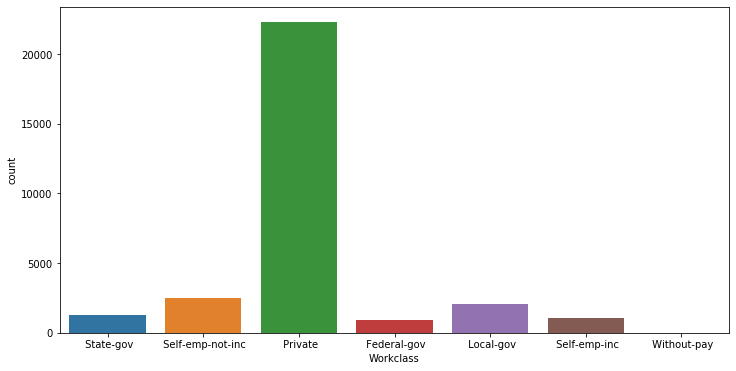

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(inc['Workclass'])
plt.show()

In [23]:
# above shows workers in private are more than any of the sectors

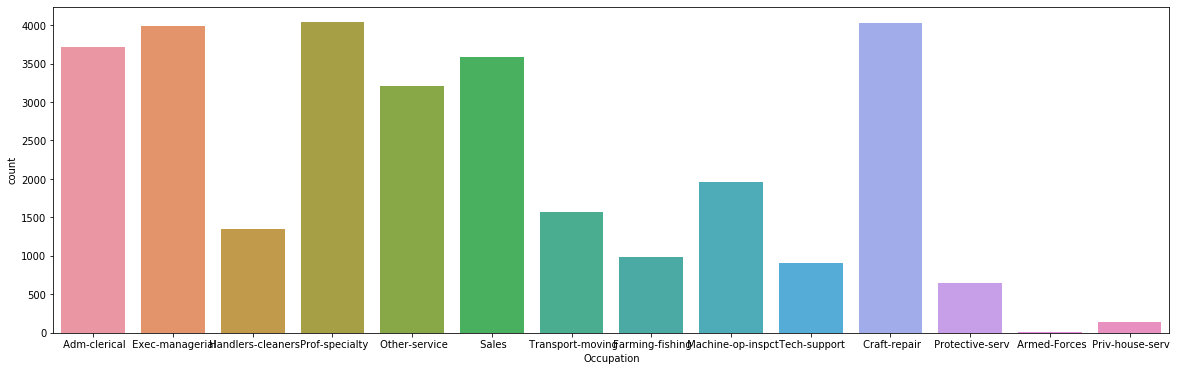

In [24]:

plt.figure(figsize=(20,6))
sns.countplot(inc['Occupation'])
plt.show()

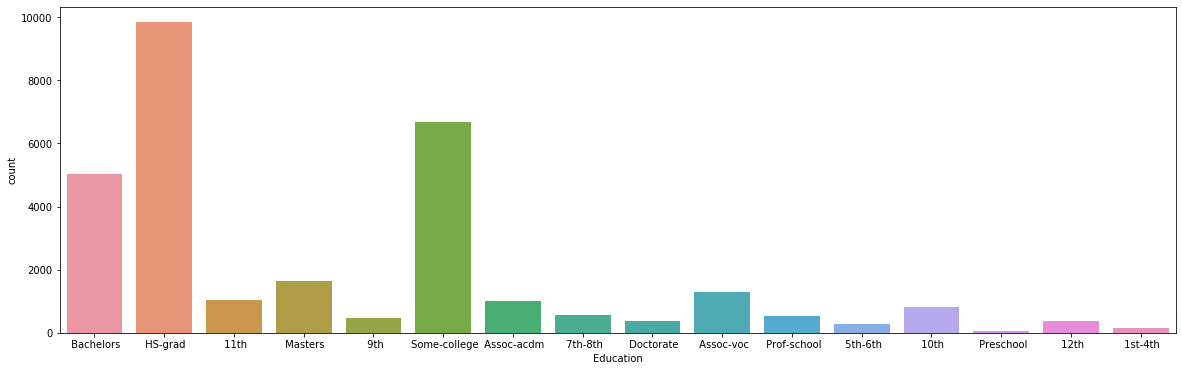

In [25]:
plt.figure(figsize=(20,6))
sns.countplot(inc['Education'])
plt.show()

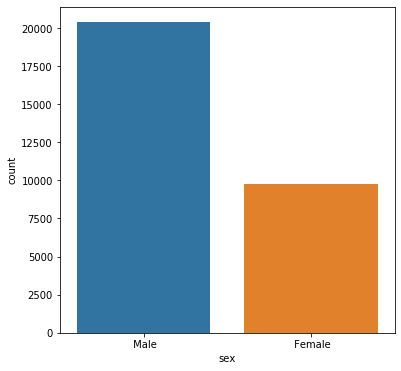

In [26]:
plt.figure(figsize=(6,6))
sns.countplot(inc['sex'])
plt.show()

In [27]:
# Here graph shows that the count of males is greater than females

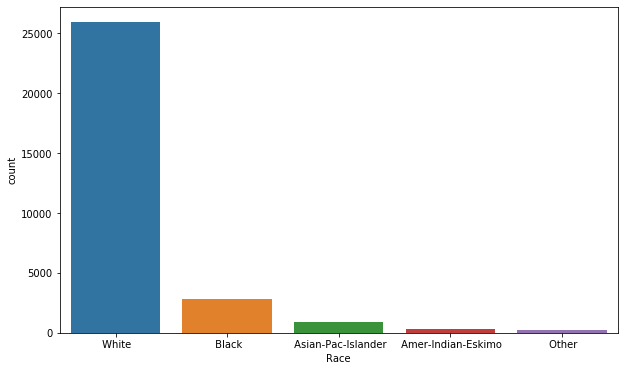

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(inc['Race'])
plt.show()

In [29]:
# Here above shows white people have high count than any other ethnic group

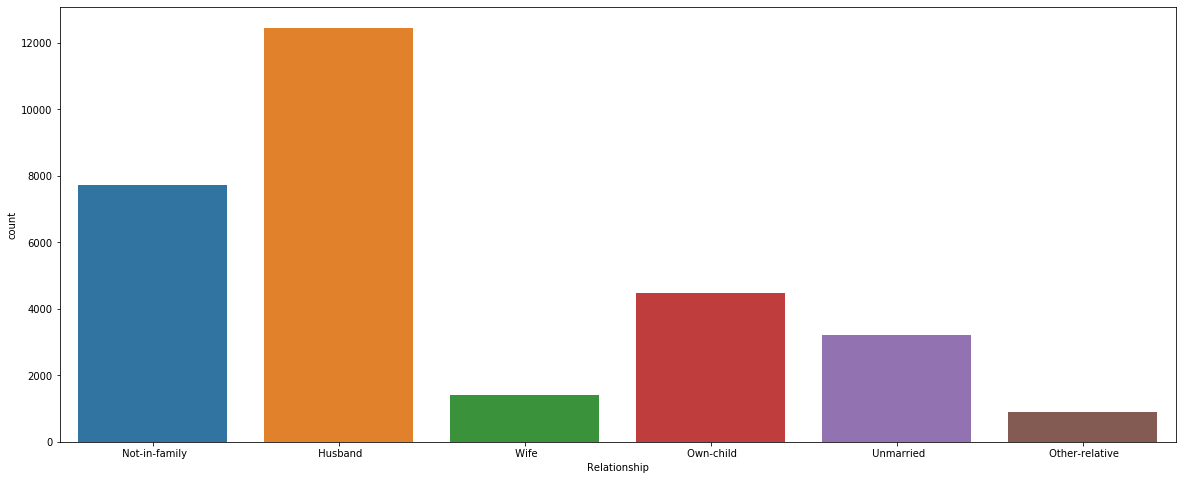

In [30]:
plt.figure(figsize=(20,8))
sns.countplot(inc['Relationship'])
plt.show()

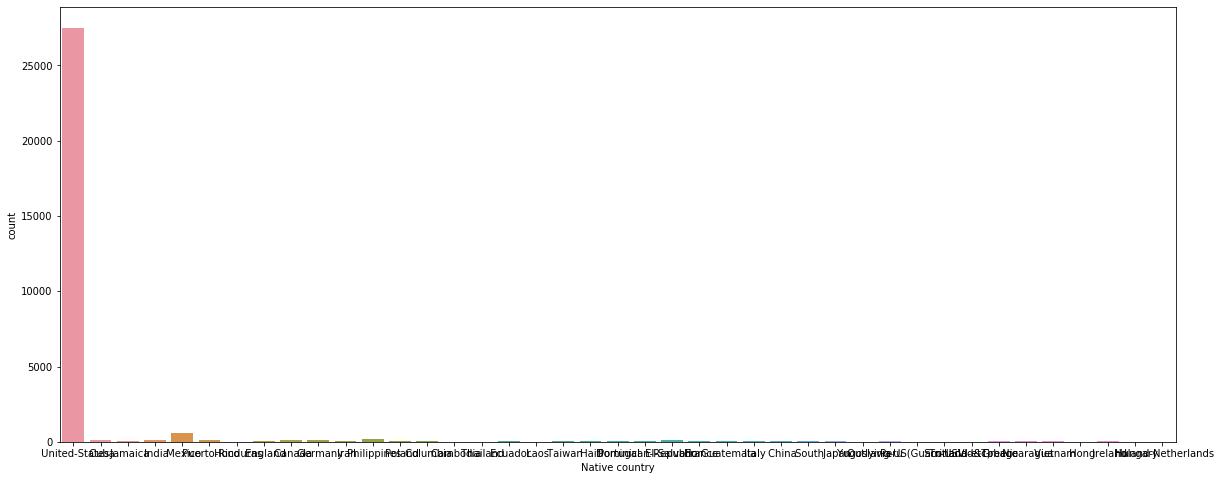

In [31]:
plt.figure(figsize=(20,8))
sns.countplot(inc['Native country'])
plt.show()

In [32]:
# here graph shows that the local nationals have high count than other nationalities

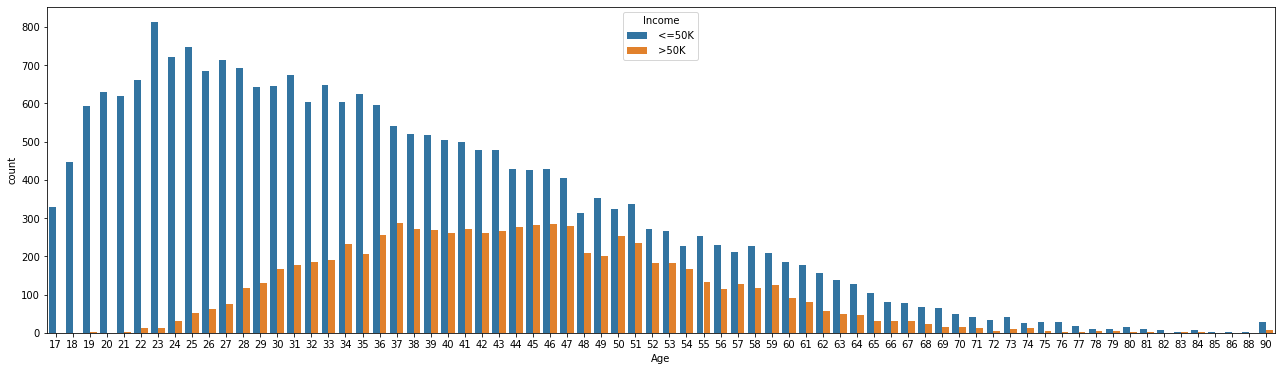

In [33]:
plt.figure(figsize=(22,6))
sns.countplot( data = inc, x="Age",hue = "Income")
plt.show()

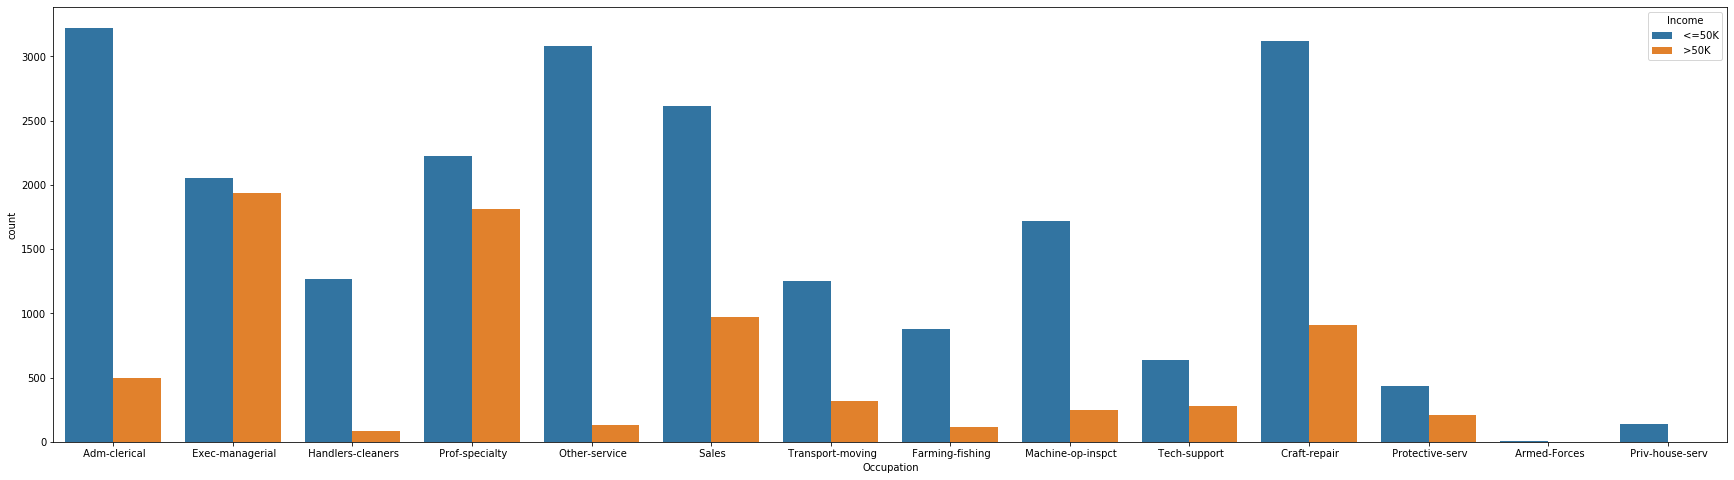

In [34]:
plt.figure(figsize=(30,8))
sns.countplot( data = inc, x="Occupation",hue = "Income")
plt.show()

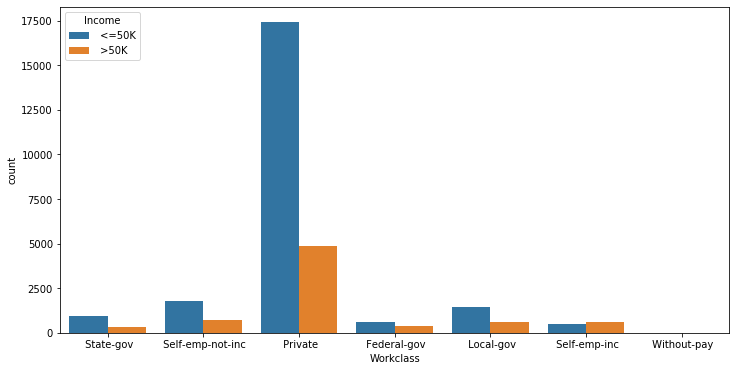

In [35]:
plt.figure(figsize=(12,6))
sns.countplot( data = inc, x="Workclass",hue = "Income")
plt.show()

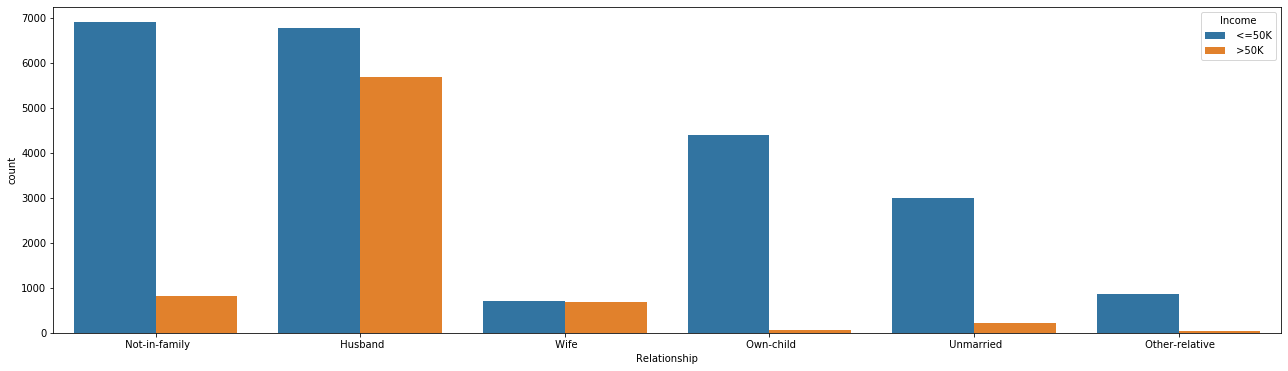

In [36]:
plt.figure(figsize=(22,6))
sns.countplot( data = inc, x="Relationship",hue = "Income")
plt.show()

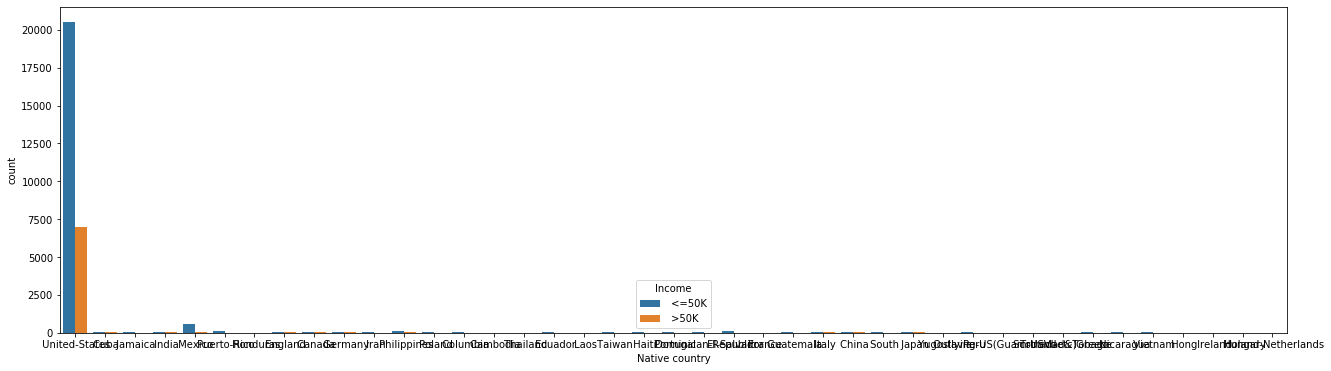

In [37]:
plt.figure(figsize=(22,6))
sns.countplot( data = inc, x="Native country",hue = "Income")
plt.show()

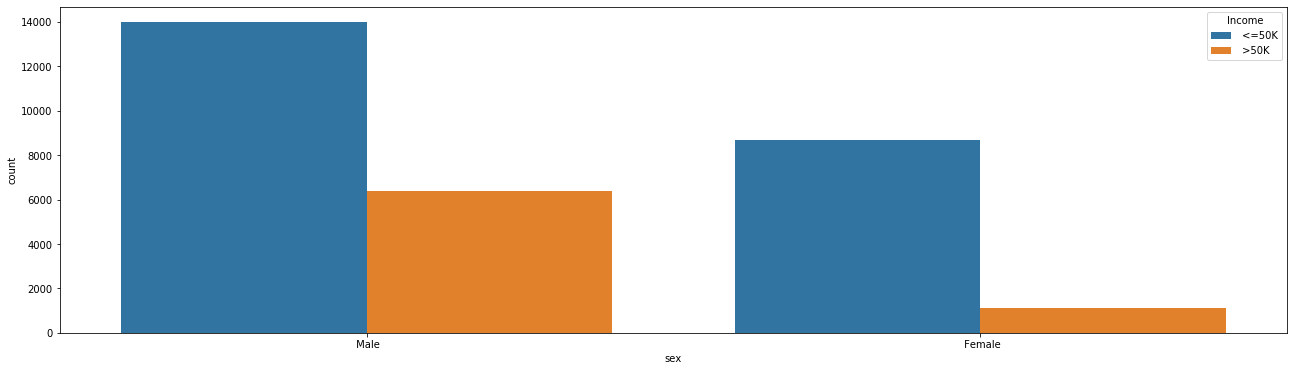

In [38]:
plt.figure(figsize=(22,6))
sns.countplot( data = inc, x="sex",hue = "Income")
plt.show()

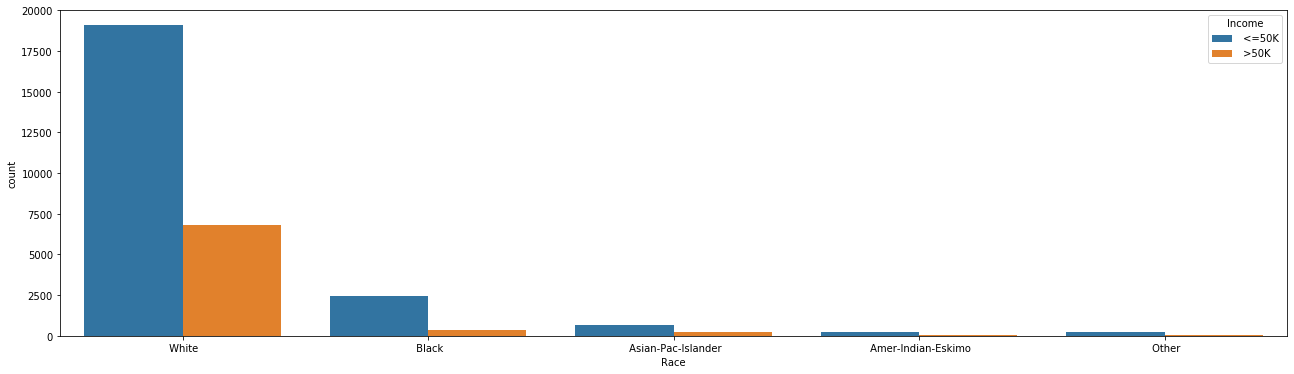

In [39]:
plt.figure(figsize=(22,6))
sns.countplot( data = inc, x="Race",hue = "Income")
plt.show()

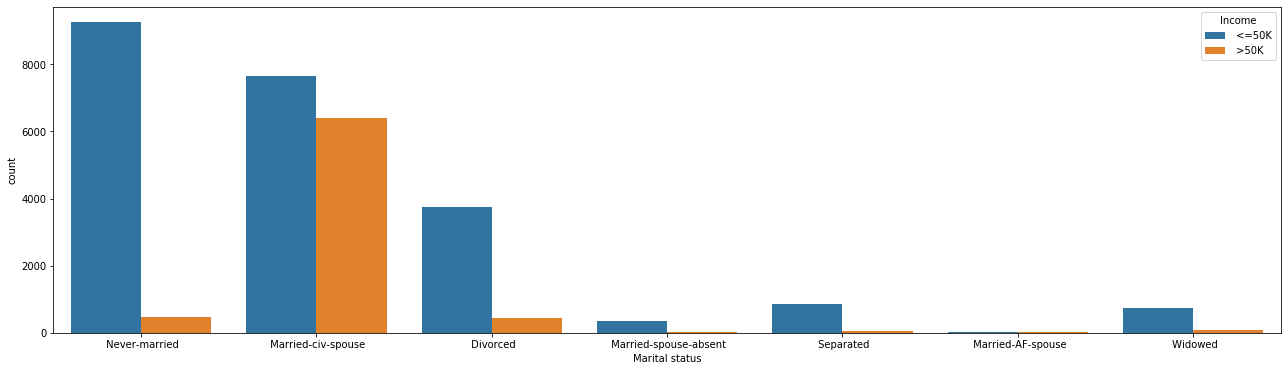

In [40]:
plt.figure(figsize=(22,6))
sns.countplot( data = inc, x="Marital status",hue = "Income")
plt.show()

In [41]:
# above graph shows that never married category has high number of <= 50 k count but a lower number of >5ok count and
# married category has pretty good count of both income categories

In [42]:
inc.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-num      int64
Marital status    object
Occupation        object
Relationship      object
Race              object
sex               object
Capital Gain       int64
Capital loss       int64
Hours per week     int64
Native country    object
Income            object
dtype: object

In [43]:
inc

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,sex,Capital Gain,Capital loss,Hours per week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encode = ['Race','sex','Occupation','Education','Marital status','Workclass','Relationship','Native country','Income']
for i in encode:
    inc[i]=le.fit_transform(inc[i].astype(str))

In [45]:
inc.dtypes

Age               int64
Workclass         int32
fnlwgt            int64
Education         int32
Education-num     int64
Marital status    int32
Occupation        int32
Relationship      int32
Race              int32
sex               int32
Capital Gain      int64
Capital loss      int64
Hours per week    int64
Native country    int32
Income            int32
dtype: object

In [46]:
inc

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,sex,Capital Gain,Capital loss,Hours per week,Native country,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


Age                  AxesSubplot(0.125,0.816017;0.133621x0.0639831)
Workclass         AxesSubplot(0.285345,0.816017;0.133621x0.0639831)
fnlwgt             AxesSubplot(0.44569,0.816017;0.133621x0.0639831)
Education         AxesSubplot(0.606034,0.816017;0.133621x0.0639831)
Education-num     AxesSubplot(0.766379,0.816017;0.133621x0.0639831)
Marital status       AxesSubplot(0.125,0.739237;0.133621x0.0639831)
Occupation        AxesSubplot(0.285345,0.739237;0.133621x0.0639831)
Relationship       AxesSubplot(0.44569,0.739237;0.133621x0.0639831)
Race              AxesSubplot(0.606034,0.739237;0.133621x0.0639831)
sex               AxesSubplot(0.766379,0.739237;0.133621x0.0639831)
Capital Gain         AxesSubplot(0.125,0.662458;0.133621x0.0639831)
Capital loss      AxesSubplot(0.285345,0.662458;0.133621x0.0639831)
Hours per week     AxesSubplot(0.44569,0.662458;0.133621x0.0639831)
Native country    AxesSubplot(0.606034,0.662458;0.133621x0.0639831)
Income            AxesSubplot(0.766379,0.662458;

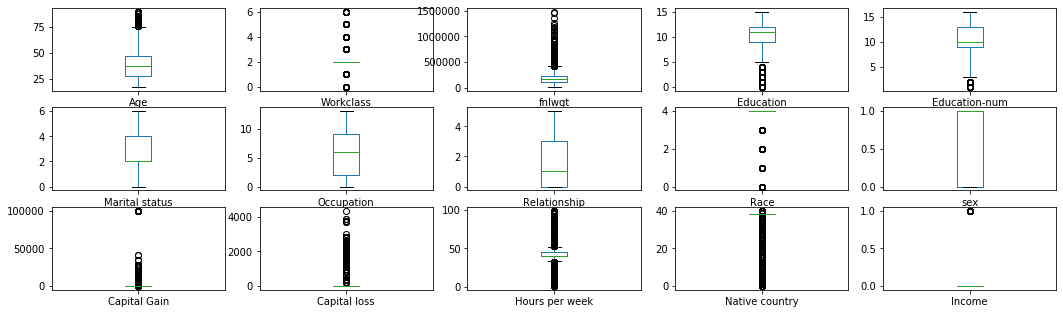

In [47]:
inc.plot(kind="box",subplots = True,layout=(10,5),figsize=(18,18))

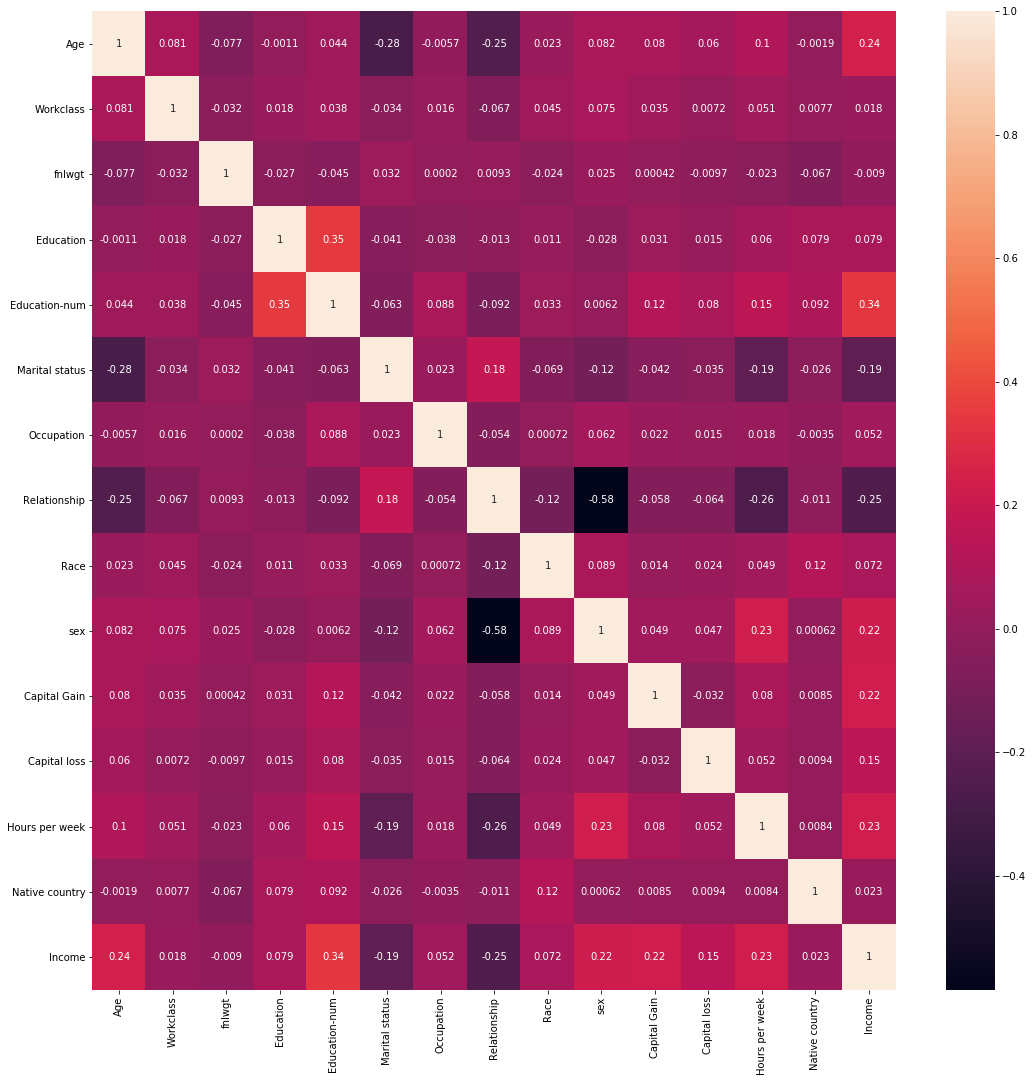

In [48]:
plt.figure(figsize=(18,18))
sns.heatmap(inc.corr(),annot= True)
plt.show()

In [49]:
from scipy.stats import zscore
z = np.abs(zscore(inc))
z
print(inc.shape)
income =inc.loc[(z<3).all(axis=1)]
print(income.shape)

(30162, 15)
(25760, 15)


In [50]:
income.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
sex               0
Capital Gain      0
Capital loss      0
Hours per week    0
Native country    0
Income            0
dtype: int64

In [51]:
income.dtypes

Age               int64
Workclass         int32
fnlwgt            int64
Education         int32
Education-num     int64
Marital status    int32
Occupation        int32
Relationship      int32
Race              int32
sex               int32
Capital Gain      int64
Capital loss      int64
Hours per week    int64
Native country    int32
Income            int32
dtype: object

In [52]:
income.skew()

Age                0.443408
Workclass          1.184029
fnlwgt             0.627909
Education         -0.965877
Education-num     -0.135247
Marital status    -0.039663
Occupation         0.122640
Relationship       0.788082
Race              -2.641907
sex               -0.719910
Capital Gain       4.843972
Capital loss      28.905740
Hours per week    -0.285633
Native country    -5.337237
Income             1.269713
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E030EBD08>,
      dtype=object)

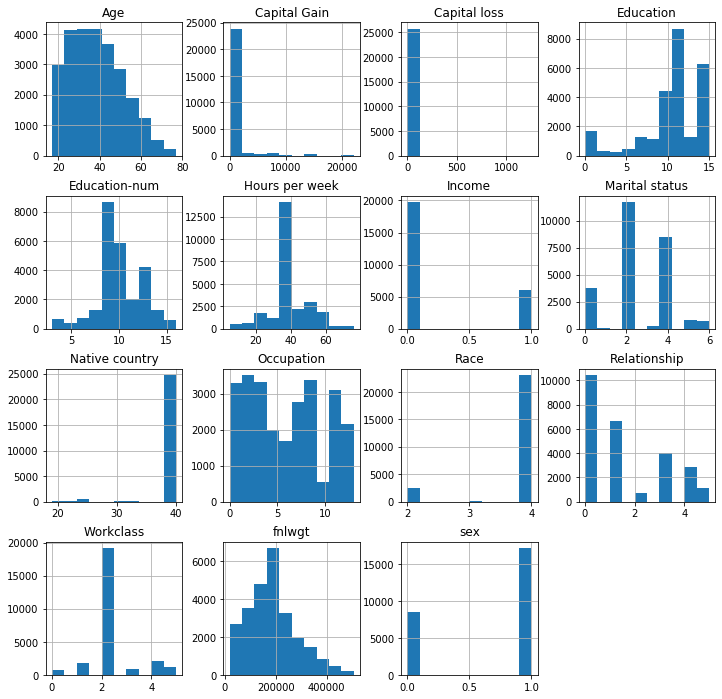

In [53]:
income.hist(figsize=(12,12)) # we have skewes data, It is required to treat the skewness

In [54]:
# splitting in x and y

In [55]:
x= income.drop(["Income"],axis=1)
y = income["Income"]
df_x= income.drop(["Income"],axis=1)

In [56]:
x.shape

(25760, 14)

In [57]:
y.shape

(25760,)

In [58]:
x.skew()

Age                0.443408
Workclass          1.184029
fnlwgt             0.627909
Education         -0.965877
Education-num     -0.135247
Marital status    -0.039663
Occupation         0.122640
Relationship       0.788082
Race              -2.641907
sex               -0.719910
Capital Gain       4.843972
Capital loss      28.905740
Hours per week    -0.285633
Native country    -5.337237
dtype: float64

In [59]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x = pt.fit_transform(x)  
x = pd.DataFrame(x,columns=df_x.columns)
x

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,sex,Capital Gain,Capital loss,Hours per week,Native country
0,0.201673,2.570760,-1.213558,-0.505167,1.223553,0.935960,-1.691007,0.139441,0.341822,0.702870,3.347889,-0.040891,-0.078755,0.161833
1,0.956507,1.785784,-1.126321,-0.505167,1.223553,-0.363205,-0.619238,-1.094651,0.341822,0.702870,-0.298693,-0.040891,-2.339068,0.161833
2,0.125419,-0.122672,0.414243,0.070217,-0.482734,-1.749667,-0.091909,0.139441,0.341822,0.702870,-0.298693,-0.040891,-0.078755,0.161833
3,1.140337,-0.122672,0.594587,-2.099610,-1.289169,-0.363205,-0.091909,-1.094651,-2.928207,0.702870,-0.298693,-0.040891,-0.078755,0.161833
4,0.047647,-0.122672,1.036979,0.379862,1.666653,-0.363205,-0.619238,1.552368,0.341822,-1.422738,-0.298693,-0.040891,-0.078755,0.161833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25755,-0.832546,-0.122672,0.799721,-1.017956,0.786653,-0.363205,1.359130,1.552368,0.341822,-1.422738,-0.298693,-0.040891,-0.266335,0.161833
25756,0.276474,-0.122672,-0.220626,0.070217,-0.482734,-0.363205,0.145422,-1.094651,0.341822,0.702870,-0.298693,-0.040891,-0.078755,0.161833
25757,1.429973,-0.122672,-0.248349,0.070217,-0.482734,2.188375,-1.691007,1.355530,0.341822,-1.422738,-0.298693,-0.040891,-0.078755,0.161833
25758,-1.367519,-0.122672,0.275699,0.070217,-0.482734,0.935960,-1.691007,1.095957,0.341822,0.702870,-0.298693,-0.040891,-1.819006,0.161833


In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns=df_x.columns)

In [61]:
x

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,sex,Capital Gain,Capital loss,Hours per week,Native country
0,0.201673,2.570760,-1.213558,-0.505167,1.223553,0.935960,-1.691007,0.139441,0.341822,0.702870,3.347889,-0.040891,-0.078755,0.161833
1,0.956507,1.785784,-1.126321,-0.505167,1.223553,-0.363205,-0.619238,-1.094651,0.341822,0.702870,-0.298693,-0.040891,-2.339068,0.161833
2,0.125419,-0.122672,0.414243,0.070217,-0.482734,-1.749667,-0.091909,0.139441,0.341822,0.702870,-0.298693,-0.040891,-0.078755,0.161833
3,1.140337,-0.122672,0.594587,-2.099610,-1.289169,-0.363205,-0.091909,-1.094651,-2.928207,0.702870,-0.298693,-0.040891,-0.078755,0.161833
4,0.047647,-0.122672,1.036979,0.379862,1.666653,-0.363205,-0.619238,1.552368,0.341822,-1.422738,-0.298693,-0.040891,-0.078755,0.161833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25755,-0.832546,-0.122672,0.799721,-1.017956,0.786653,-0.363205,1.359130,1.552368,0.341822,-1.422738,-0.298693,-0.040891,-0.266335,0.161833
25756,0.276474,-0.122672,-0.220626,0.070217,-0.482734,-0.363205,0.145422,-1.094651,0.341822,0.702870,-0.298693,-0.040891,-0.078755,0.161833
25757,1.429973,-0.122672,-0.248349,0.070217,-0.482734,2.188375,-1.691007,1.355530,0.341822,-1.422738,-0.298693,-0.040891,-0.078755,0.161833
25758,-1.367519,-0.122672,0.275699,0.070217,-0.482734,0.935960,-1.691007,1.095957,0.341822,0.702870,-0.298693,-0.040891,-1.819006,0.161833


In [62]:
x.skew()

Age               -0.021520
Workclass          0.122427
fnlwgt            -0.034667
Education         -0.296304
Education-num      0.028059
Marital status    -0.129004
Occupation        -0.203260
Relationship       0.124492
Race              -2.583865
sex               -0.719910
Capital Gain       3.049399
Capital loss      24.415996
Hours per week     0.123739
Native country     1.627643
dtype: float64

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC()
dt= DecisionTreeClassifier()
gnb = GaussianNB()
lr = LogisticRegression()

In [94]:
def acuu_score(regr,x,y):
    max_r_score = 0 
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        acc_scr = accuracy_score(y_test,y_pred)
        print("accuracy score corresponding to ",r_state,"is",accuracy_score)
        if acc_scr>max_r_score:
            max_r_score = acc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [95]:
r_state = acuu_score(lr,x,y)

accuracy score corresponding to  42 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  43 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  44 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  45 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  46 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  47 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  48 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  49 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  50 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  51 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  52 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  53 is <fun

In [102]:
r_state =acuu_score(knn,x,y)

accuracy score corresponding to  42 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  43 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  44 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  45 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  46 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  47 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  48 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  49 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  50 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  51 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  52 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  53 is <fun

In [97]:
r_state =acuu_score(dt,x,y)

accuracy score corresponding to  42 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  43 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  44 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  45 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  46 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  47 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  48 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  49 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  50 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  51 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  52 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  53 is <fun

In [98]:
r_state =acuu_score(svc,x,y)

accuracy score corresponding to  42 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  43 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  44 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  45 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  46 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  47 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  48 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  49 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  50 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  51 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  52 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  53 is <fun

In [100]:
r_state =acuu_score(gnb,x,y)   # 

accuracy score corresponding to  42 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  43 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  44 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  45 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  46 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  47 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  48 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  49 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  50 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  51 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  52 is <function accuracy_score at 0x0000021E7F876B88>
accuracy score corresponding to  53 is <fun

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=88)  #since max result I obtained at random state = 88 .I will use it.

In [83]:
parameters = {"n_neighbors": range(1,20)}
gsc = GridSearchCV(knn,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_neighbors': 19}

In [84]:
parameters = {"n_estimators": range(1,20)}
gsc = GridSearchCV(rfc,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_estimators': 18}

In [85]:
knn =KNeighborsClassifier(n_neighbors= 19)
svc = SVC()
dt= DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators= 18)
lr = LogisticRegression()
gnb = GaussianNB()

In [86]:
models=[]
models.append(("KNeighborsClassifier",knn))
models.append(("SVC",svc))
models.append(("DecisionTreeClassifier",dt))
models.append(("LogisticRegression",lr))
models.append(("GaussianNB",gnb))

********************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')


Accuracy score =  0.836607457946124


cross_val_score=  0.8332298136645961


roc_auc_score =  0.7483926743827927


Classification_Report
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      6618
           1       0.64      0.59      0.62      1883

    accuracy                           0.84      8501
   macro avg       0.76      0.75      0.76      8501
weighted avg       0.83      0.84      0.83      8501



[[6001  617]
 [ 772 1111]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf'

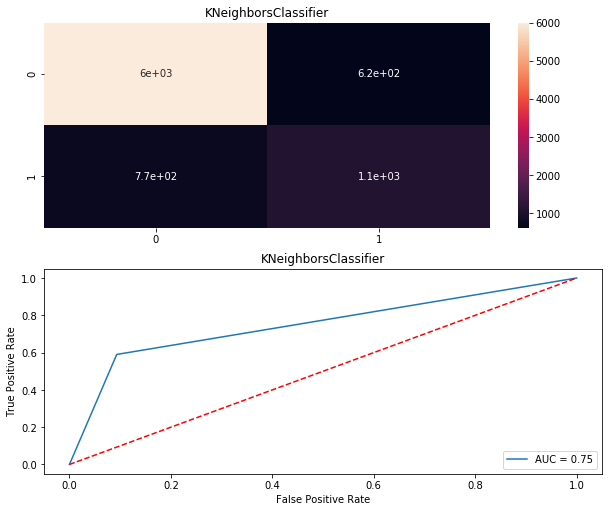

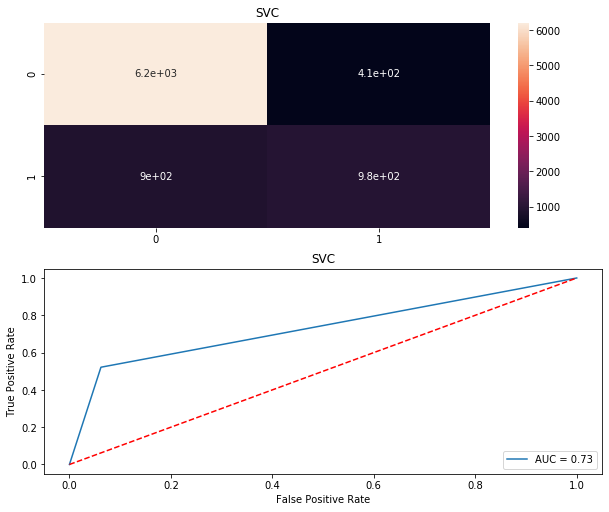

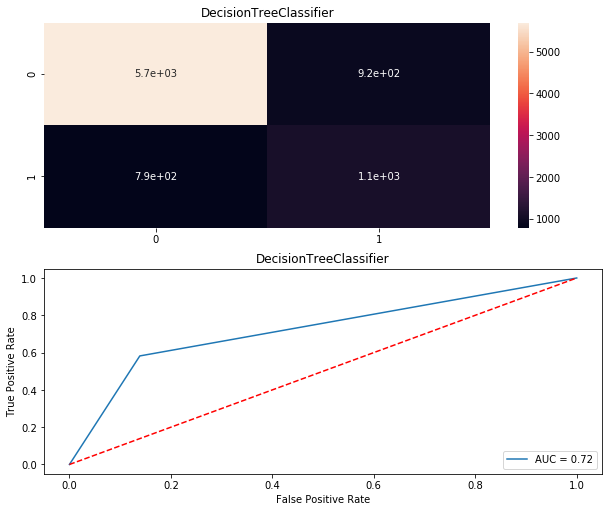

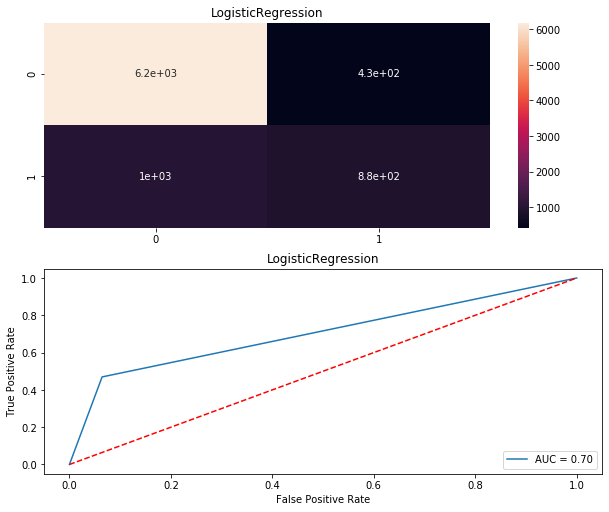

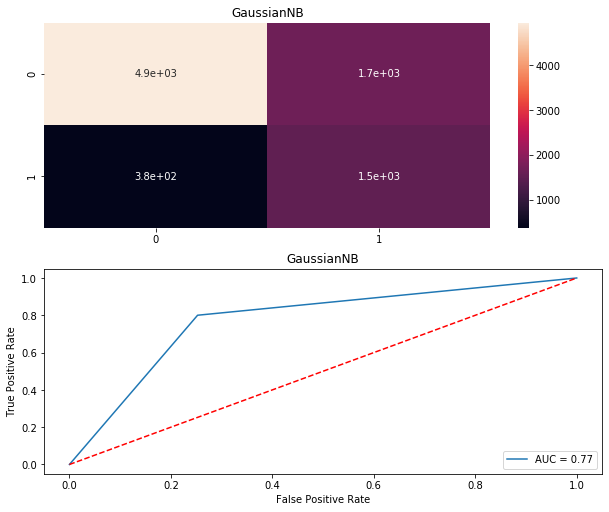

In [88]:
Model =[]
score =[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print("Accuracy score = ",AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    print("cross_val_score= ",sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score = ",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print("Classification_Report\n",classification_report(y_test,pre))
    print('\n')
    cm = confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot = True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label = "AUC = %0.2f"%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc="lower right")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [89]:
result = pd.DataFrame({"Model": Model,"Accuracy Score":score,"Cross_val_score":cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,83.660746,83.322981,74.839267
1,SVC,84.566522,83.571429,72.970244
2,DecisionTreeClassifier,79.943536,80.314441,72.166866
3,LogisticRegression,83.237266,82.538820,70.254686
4,GaussianNB,75.908717,75.920031,77.383717


In [91]:
from sklearn.externals import joblib

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [92]:
joblib.dump(svc,"Income Prediction.obj")

['Income Prediction.obj']

In [93]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])